In [1]:
%tensorflow_version 2.x

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [5]:
air = pd.read_csv('AirQualityUCI.csv')

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [9]:
air.shape

(9471, 17)

In [10]:
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


**As we could see -200 present in all the columns its a dummy value which needs to be treated**


In [11]:
# Dropping the unwanted columns
air = air.drop('Unnamed: 15',1)
air = air.drop('Unnamed: 16',1)

In [12]:
# Converting Time and Date to Datetime format
air['Date'] = pd.to_datetime(air['Date'])
air['Time'] = pd.to_datetime(air['Time'])

In [13]:
# Getting Day,Month,Year,Minute and Hour from Date and Time
air['Day'] = air['Date'].apply(lambda x:x.day)
air['Month'] = air['Date'].apply(lambda x:x.month)
air['Year'] = air['Date'].apply(lambda x:x.year)

As we dont require now Date and Time column we can drop it

In [14]:
# Dropping Date and Time
air = air.drop('Date',1)
air = air.drop('Time',1)

In [15]:
# Replacing -200 value with null values
air = air.replace(to_replace=-200,value=np.nan)

In [16]:
# Checking for null values
air.isnull().sum()

CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Day               114
Month             114
Year              114
dtype: int64

In [17]:
# Treating all the null values with median
air = air.fillna(value=air.median())

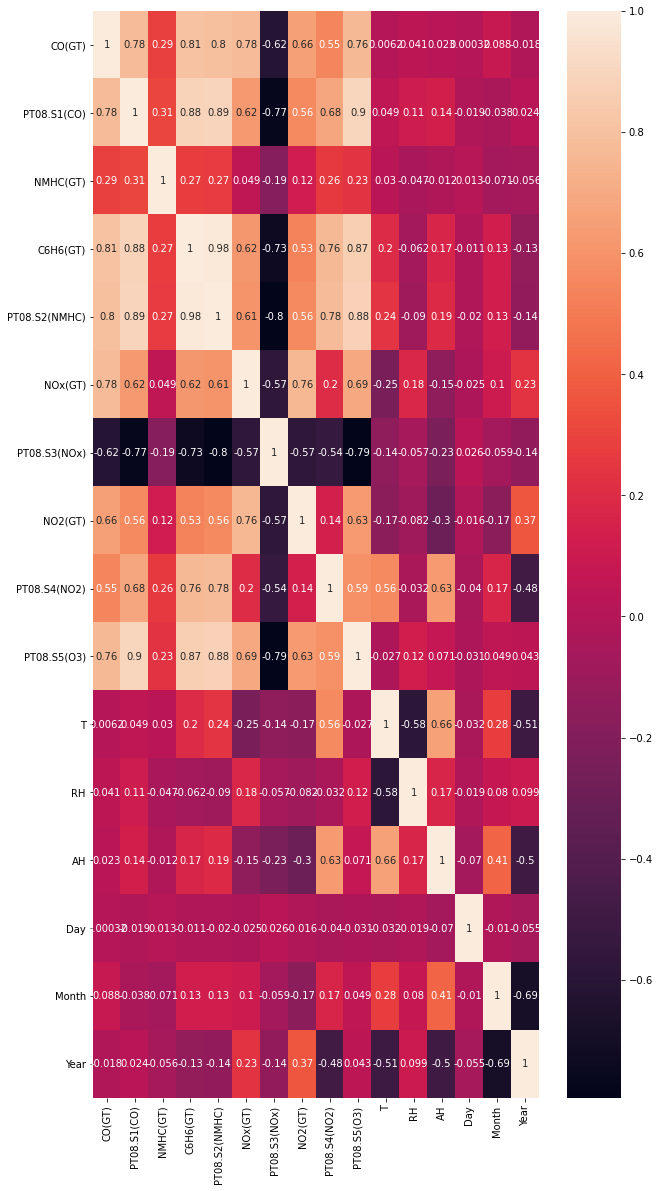

In [18]:
# Plotting heatmap for the dataset
plt.figure(figsize=(10,20))
sns.heatmap(air.corr(),annot=True)

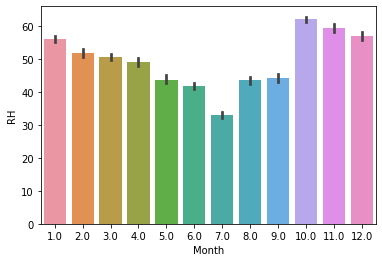

In [19]:
# Bar plot for Month vs RH
sns.barplot(x='Month',y='RH',data=air)

**From the graph we are able to see that the humidity is more for months October,November and December.The temperature is very less during these months**

Lets see if Temperature and RH are related to each other

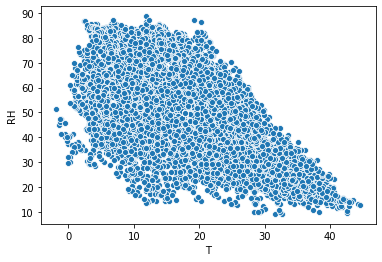

In [20]:
# Scatter plot for T vs RH
sns.scatterplot(x='T',y='RH',data=air)

**As we could see the datapoints are scattered in the downward direction so we can hence prove that with increase in humidity there is decrease in temperature**

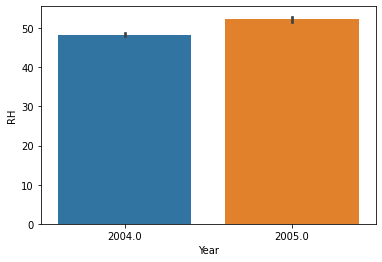

In [21]:
# Bar plot for Year vs RH
sns.barplot(x='Year',y='RH',data=air)

**We could see that RH is higher for year 2005**

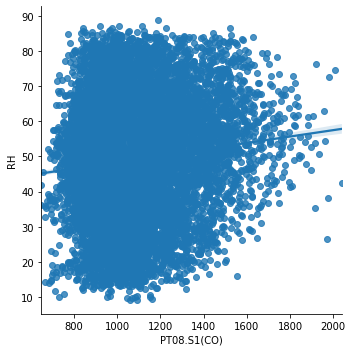

In [22]:
# Lm Plot for PT08.S1(CO) vs RH
sns.lmplot(x='PT08.S1(CO)',y='RH',data=air)

**We can see that both PT08.S2(CO) and PT08.S2(NMHC) are positively linearly correlating**

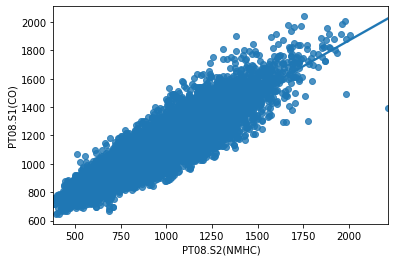

In [23]:
# Reg Plot for PT08.S2(NMHC) vs PT08.S1(CO)
sns.regplot(x='PT08.S2(NMHC)',y='PT08.S1(CO)',data=air)

**Well as we could see PT08.S2(NMHC) is positively correlating with PT08.S1(CO) so the correlation of PT08.S1(CO) being positive is True**

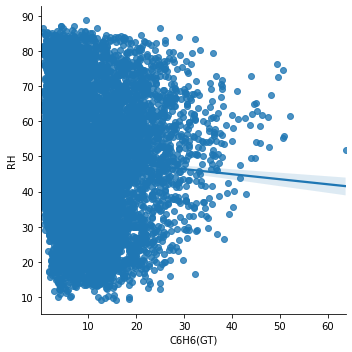

In [24]:
# Plot for C6H6(GT) vs RH
sns.lmplot(x='C6H6(GT)',y='RH',data=air)

Due to the presence of little data points we are not able to prove the correlation

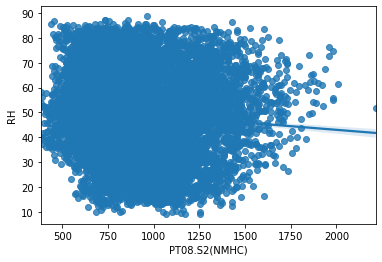

In [25]:
# Plot for PT08.S2(NMHC) vs RH
sns.regplot(x='PT08.S2(NMHC)',y='RH',data=air)

**We could see there negative correlation between PT08.S2(NMHC) and RH**

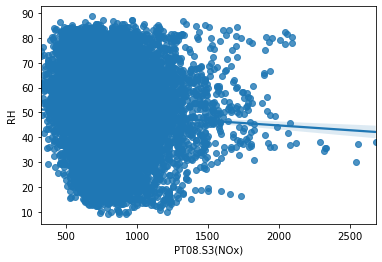

In [26]:
# Plot for PT08.S3(NOx) vs RH
sns.regplot(x='PT08.S3(NOx)',y='RH',data=air)

**We could see there negative correlation between PT08.S3(NOx) and RH**

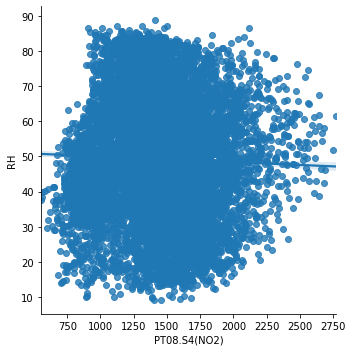

In [27]:
# Plot for PT08.S4(NO2) vs RH
sns.lmplot(x='PT08.S4(NO2)',y='RH',data=air)

**As the regression is present in the middle we cant say anything for sure**

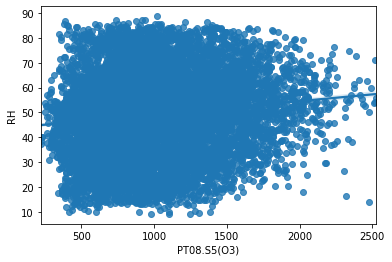

In [28]:
# Plot for PT08.S5(O3) vs RH
sns.regplot(x='PT08.S5(O3)',y='RH',data=air)

**We could see there positive correlation between PT08.S5(O3) and RH**

In [29]:
# Importing train_test split and splitting the dataset to train and test
from sklearn.model_selection import train_test_split

train,test = train_test_split(air,test_size=0.25,random_state=2)

In [30]:
# Compute descriptive statistics of train data
train_stats = train.describe()
train_stats.pop("RH")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CO(GT),7103.0,2.070322,1.311095,0.1000,1.2000,1.8000,2.5000,11.9000
PT08.S1(CO),7103.0,1095.657609,211.375463,647.0000,943.0000,1063.0000,1211.0000,2040.0000
NMHC(GT),7103.0,156.343798,66.611273,7.0000,150.0000,150.0000,150.0000,1189.0000
C6H6(GT),7103.0,9.905829,7.241871,0.1000,4.6000,8.2000,13.4000,52.1000
PT08.S2(NMHC),7103.0,934.782768,258.816612,383.0000,743.0000,909.0000,1097.0000,2007.0000
NOx(GT),7103.0,233.738702,194.396831,2.0000,113.0000,180.0000,280.0000,1479.0000
PT08.S3(NOx),7103.0,835.353372,250.363931,322.0000,671.0000,806.0000,958.0000,2683.0000
NO2(GT),7103.0,112.014923,43.740274,2.0000,86.0000,109.0000,132.0000,340.0000
PT08.S4(NO2),7103.0,1452.531325,334.220160,551.0000,1244.0000,1463.0000,1653.0000,2775.0000
PT08.S5(O3),7103.0,1016.119245,388.657366,221.0000,743.0000,963.0000,1242.0000,2523.0000


In [31]:
# Assign target label as charges as we are going to predict the same
train_labels = train.pop('RH')
test_labels = test.pop('RH')

In [32]:
# Creating a function to normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
train_norm = norm(train)
test_norm = norm(test)

In [33]:
#Create model layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


#Choose optimizer
optimizer = tf.keras.optimizers.Adam()

#Compile model with mean squared error as loss function
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [34]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Validating the model with epochs (or) no of cycles
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(train_norm, train_labels,epochs=EPOCHS, validation_split = 0.2,callbacks=[early_stop], verbose=1)

Epoch 1/1000
178/178 [==============================] - 0s 2ms/step - loss: 1148.1768 - mae: 27.8477 - mse: 1148.1768 - val_loss: 298.0023 - val_mae: 13.8920 - val_mse: 298.0023
Epoch 2/1000
178/178 [==============================] - 0s 1ms/step - loss: 156.7724 - mae: 9.9890 - mse: 156.7724 - val_loss: 81.3105 - val_mae: 7.1967 - val_mse: 81.3105
Epoch 3/1000
178/178 [==============================] - 0s 1ms/step - loss: 55.5503 - mae: 5.9029 - mse: 55.5503 - val_loss: 41.5432 - val_mae: 4.9982 - val_mse: 41.5432
Epoch 4/1000
178/178 [==============================] - 0s 1ms/step - loss: 32.5837 - mae: 4.4471 - mse: 32.5837 - val_loss: 27.2636 - val_mae: 3.9982 - val_mse: 27.2636
Epoch 5/1000
178/178 [==============================] - 0s 1ms/step - loss: 23.0404 - mae: 3.6941 - mse: 23.0404 - val_loss: 20.5567 - val_mae: 3.4004 - val_mse: 20.5567
Epoch 6/1000
178/178 [==============================] - 0s 1ms/step - loss: 16.4280 - mae: 3.0889 - mse: 16.4280 - val_loss: 13.4862 - val_m

In [36]:
# Dataframe created for 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
94,0.135790,0.281378,0.135790,0.192128,0.339858,0.192128,94
95,0.152221,0.293473,0.152221,0.451215,0.455984,0.451215,95
96,0.191423,0.321020,0.191423,0.185019,0.322658,0.185019,96
97,0.143049,0.283021,0.143049,0.297924,0.410943,0.297924,97
98,0.146104,0.287844,0.146104,0.225011,0.377184,0.225011,98


In [37]:
loss, mae, mse = model.evaluate(test_norm, test_labels, verbose=2)

print("Testing set Mean Absolute Error: {:5.2f} RH".format(mae))

74/74 - 0s - loss: 0.2231 - mae: 0.3724 - mse: 0.2231
Testing set Mean Absolute Error:  0.37 RH


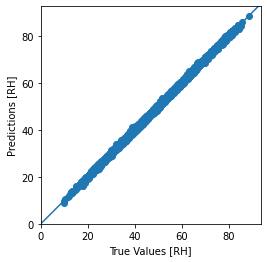

In [38]:
#model predictions on test data
test_predictions = model.predict(test_norm).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])